# Vorbereitung der annotierten Daten und Erstellen der Teildatensätze

## Daten einlesen

In [1]:
import pandas as pd

In [2]:
# Gesamtdatensatz
df = pd.read_excel("df_de.xlsx")

# Annotierte Daten
accounts_annotiert = pd.read_excel("accounts_annotation_raw.xlsx")

In [3]:
accounts_annotiert

,tweet_creator_atName,tweet_creator_screenName,tweet_creator_bio,gender,institution,author_category
0,GreenFire_93D,GreenFire_Dancer,NaN,0,0,0
1,lisacarstensen5,@lisacarstensen@toot.community,"Social Scientist, she/her, Global Political Ec...",2,4,1
2,Mag2012Ge,maggie🇪🇺 #StandWithUkraine 🇺🇦,#blacklivesmatter #humanrights #animalrights #...,2,4,0
3,MailanderUlla,Ulla Mailänder,Mutter eines erwachsenen Sohnes mit ME/CFS und...,2,4,0
4,HannesKopf,Hannes Kopf,NaN,1,4,0
...,...,...,...,...,...,...
10997,TanjaAbou,Tanja Abou,Praxisforschung | Soziale Arbeit | #Careleaver...,2,4,2
10998,Dr_GackGack,Schwurbeldoktor,"Mama, Ärztin, Wissenschaftlerin. Gegen Bevormu...",2,4,2
10999,unrealWLVTR,🇺🇦🇪🇺🇩🇪 WLvTR,„Man kann in wahrer Freiheit leben und doch ni...,2,4,2
11000,SuzannePeacock9,Zooza Peacock,"expert, political scientist, aphorist; license...",2,4,1


## Bereinigen der Daten

In [4]:
doppelte_accounts = accounts_annotiert[accounts_annotiert.duplicated(subset='tweet_creator_atName', keep=False)]
doppelte_accounts = doppelte_accounts.sort_values(by='tweet_creator_atName')
doppelte_accounts

,tweet_creator_atName,tweet_creator_screenName,tweet_creator_bio,gender,institution,author_category
1431,1789_nana,NANA🎈,FREIHEIT IST PARADIES. TOTALITARISMUS IST HÖLL...,2,4,0
5681,1789_nana,NAHI🎈,FREIHEIT IST PARADIES. TOTALITARISMUS IST HÖLL...,2,4,0
8939,1worldvs1virus,Herbert,111 corona🖤 Kinder und 160 768 Corona🖤 sind ei...,1,4,0
10368,1worldvs1virus,Herbert,111 corona🖤 Kinder und 160 768 Corona🖤 sind ei...,1,4,0
911,666Ernie,Erwin Schellhorn,Born at 320 ppm #NoMoreEmtyPromises #NoMoreEmt...,1,4,0
...,...,...,...,...,...,...
4051,wie_jetzt,Wie jetzt?!,Mal wieder neu starten.,0,0,0
9378,wie_jetzt,Wie jetzt?!,Mal wieder neu starten.,0,0,0
7144,yousitonmyspot,InViennaVeritas,citizen journalist #ActuallyAutistic | meteoro...,0,4,0
4102,yousitonmyspot,InViennaVeritas,citizen journalist #ActuallyAutistic | meteoro...,0,4,2


In [5]:
accounts_annotiert = accounts_annotiert.drop_duplicates(subset='tweet_creator_atName')

In [6]:
accounts_annotiert.shape

(10818, 6)

#### Zahlenwerte ersetzen

In [7]:
accounts_annotiert.loc[:, 'gender'] = accounts_annotiert['gender'].replace({0: 'unklar', 1: 'männlich', 2: 'weiblich', 3: 'non-binär'})
accounts_annotiert.loc[:, 'institution'] = accounts_annotiert['institution'].replace({0: 'unklar', 1: 'Nachrichtendienst', 2: 'Forschungsinstitution', 3: 'Universität/Hochschule', 4: 'Person'})
accounts_annotiert.loc[:, 'author_category'] = accounts_annotiert['author_category'].replace({0: 'unklar', 1: 'Wissenschaftler*in', 2: 'wissenschaftsnah', 3: 'Politiker*in', 13: 'Wissenschaftler*in und Politiker*in', 23: 'Wissenschaftsnahe Politiker*in'})

In [8]:
accounts_annotiert

,tweet_creator_atName,tweet_creator_screenName,tweet_creator_bio,gender,institution,author_category
0,GreenFire_93D,GreenFire_Dancer,NaN,unklar,unklar,unklar
1,lisacarstensen5,@lisacarstensen@toot.community,"Social Scientist, she/her, Global Political Ec...",weiblich,Person,Wissenschaftler*in
2,Mag2012Ge,maggie🇪🇺 #StandWithUkraine 🇺🇦,#blacklivesmatter #humanrights #animalrights #...,weiblich,Person,unklar
3,MailanderUlla,Ulla Mailänder,Mutter eines erwachsenen Sohnes mit ME/CFS und...,weiblich,Person,unklar
4,HannesKopf,Hannes Kopf,NaN,männlich,Person,unklar
...,...,...,...,...,...,...
10996,elke_sophia,Elke_Sophia,"computer science, business administration, ai,...",weiblich,Person,unklar
10997,TanjaAbou,Tanja Abou,Praxisforschung | Soziale Arbeit | #Careleaver...,weiblich,Person,wissenschaftsnah
10998,Dr_GackGack,Schwurbeldoktor,"Mama, Ärztin, Wissenschaftlerin. Gegen Bevormu...",weiblich,Person,wissenschaftsnah
11000,SuzannePeacock9,Zooza Peacock,"expert, political scientist, aphorist; license...",weiblich,Person,Wissenschaftler*in


## Überblick Datensatz Accounts

In [9]:
import matplotlib.pyplot as plt
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

In [10]:
accounts_annotiert.shape

(10818, 6)

#### Gender Verteilung

In [11]:
gender_counts = accounts_annotiert[accounts_annotiert['institution'] == 'Person']['gender'].value_counts()
gender_counts

gender
männlich     4401
weiblich     2470
unklar        889
non-binär      99
Name: count, dtype: int64

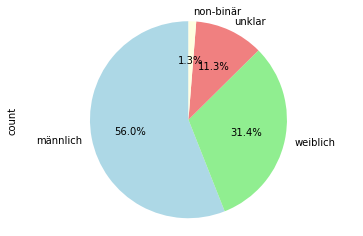

In [12]:
# Visualisieren der Ergebnisse in einem Kreisdiagramm
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Gleichmäßige Skalierung, um ein Kreisdiagramm sicherzustellen
plt.show()

#### Insitution Verteilung

In [13]:
institution_counts = accounts_annotiert['institution'].value_counts()
institution_counts

institution
Person                    7859
unklar                    2605
Forschungsinstitution      229
Nachrichtendienst           85
Universität/Hochschule      40
Name: count, dtype: int64

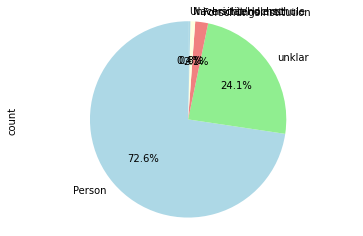

In [14]:
# Visualisieren der Ergebnisse in einem Kreisdiagramm
institution_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Gleichmäßige Skalierung, um ein Kreisdiagramm sicherzustellen
plt.show()

#### Wissenschaftler:in Verteilung

In [15]:
wissenschaft_counts = accounts_annotiert['author_category'].value_counts()
wissenschaft_counts

author_category
unklar                                 9280
Wissenschaftler*in                      962
wissenschaftsnah                        456
Politiker*in                            108
Wissenschaftsnahe Politiker*in           11
Wissenschaftler*in und Politiker*in       1
Name: count, dtype: int64

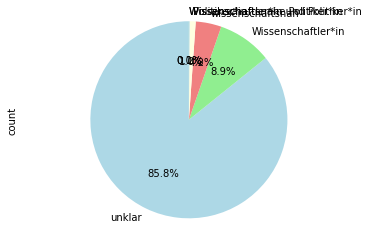

In [16]:
# Visualisieren der Ergebnisse in einem Kreisdiagramm
wissenschaft_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Gleichmäßige Skalierung, um ein Kreisdiagramm sicherzustellen
plt.show()

In [17]:
gender_wissenschafts_counts = accounts_annotiert[(accounts_annotiert['author_category'] == 'Wissenschaftler*in') | (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in')]['gender'].value_counts()
gender_wissenschafts_counts 

gender
männlich     525
weiblich     407
unklar        25
non-binär      6
Name: count, dtype: int64

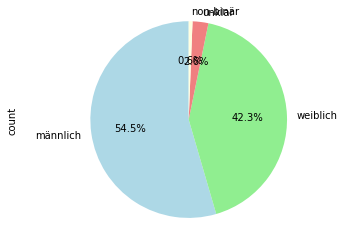

In [18]:
# Visualisieren der Ergebnisse in einem Kreisdiagramm
gender_wissenschafts_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Gleichmäßige Skalierung, um ein Kreisdiagramm sicherzustellen
plt.show()

In [19]:
gender_wissenschafts_erweitert_counts = accounts_annotiert[(accounts_annotiert['author_category'] == 'Wissenschaftler*in') | (accounts_annotiert['author_category'] == 'wissenschaftsnah') | (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in')| (accounts_annotiert['author_category'] == 'Wissenschaftsnahe Politiker*in')]['gender'].value_counts()
gender_wissenschafts_erweitert_counts

gender
männlich     796
weiblich     569
unklar        53
non-binär     12
Name: count, dtype: int64

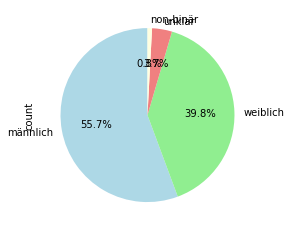

In [20]:
# Visualisieren der Ergebnisse in einem Kreisdiagramm
gender_wissenschafts_erweitert_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
plt.show()

## Tweets der annotierten Accounts filtern

In [21]:
df_annotiert = df[df['tweet_creator_atName'].isin(accounts_annotiert['tweet_creator_atName'])]
df_annotiert.shape

(25903, 26)

#### Annotierte Spalten hinzufügen

In [22]:
annotierte_spalten = ['tweet_creator_atName','gender', 'institution', 'author_category']

# Merge der DataFrames basierend auf der gemeinsamen Spalte 'tweet_creator_atName'
# how='left', um alle Zeilen in df_annotiert zu behalten
df_annotiert = pd.merge(df_annotiert, accounts_annotiert[annotierte_spalten], how='left', on='tweet_creator_atName')

#### Relevante Spalten filtern

In [23]:
df_annotiert.columns

Index(['Unnamed: 0', 'nr_flatfile', 'lfdnr_table', 'lfdnr', 'tweet_link',
       'tweet_date_create', 'tweet_creator_atName', 'tweet_creator_screenName',
       'tweet_creator_bio', 'tweet_text', 'answer_link_to_origin_tweet',
       'retweet_link_to_retweeted_tweet',
       'retweet_date_create_retweeted_tweet',
       'retweet_atName_creator_retweeted_tweet',
       'retweet_screenName_creator_retweeted_tweet',
       'retweet_bio_creator_retweeted_tweet', 'retweet_text_retweeted_tweet',
       'zitat_link_to_qouted_tweet', 'zitat_date_create_qouted_tweet',
       'zitat_atName_creator_qouted_tweet',
       'zitat_screenName_creator_qouted_tweet',
       'zitat_bio_creator_qouted_tweet', 'zitat_text', 'hashtags_tweet',
       'hashtags_retweet', 'hashtags_zitat', 'gender', 'institution',
       'author_category'],
      dtype='object')

In [24]:
df_annotiert_text = df_annotiert[['tweet_date_create','tweet_creator_atName','tweet_creator_screenName','tweet_creator_bio','tweet_text','retweet_text_retweeted_tweet','zitat_text','gender', 'institution', 'author_category']]

In [25]:
df_annotiert_text

,tweet_date_create,tweet_creator_atName,tweet_creator_screenName,tweet_creator_bio,tweet_text,retweet_text_retweeted_tweet,zitat_text,gender,institution,author_category
0,2022-12-14 20:19:48,SuchtiSchleich,Steffk,NaN,-998,"Es scheint so weit weg, so surreal, aber es fe...",-998,männlich,Person,unklar
1,2022-12-14 20:20:26,printi71,printi007 aka Dr. Canceloretta,😷 Infektionsverweigerin,-998,@mecfsbuch @nervensystemck #KleinschnitzRaussc...,#KleinschnitzRausschmiss bitte jetzt @Uniklini...,weiblich,Person,unklar
2,2022-12-14 20:20:34,4linblue1,4linblue🔱,Wenn ein Kopf und ein Buch zusammen stoßen und...,@MartinZenker @JochenBittner Hier in der Famil...,-998,-998,unklar,unklar,unklar
3,2022-12-14 20:21:01,HartwigKmmerle,Ho finito!,"+ jedem Anfang wohnt ein Zauber inne, der uns ...",-998,Forschung an einem faszinierenden Potenzialthe...,-998,männlich,Person,unklar
4,2022-12-14 20:21:11,printi71,printi007 aka Dr. Canceloretta,😷 Infektionsverweigerin,-998,#KleinschnitzRausschmiss sollte trenden!,#KleinschnitzRausschmiss bitte jetzt @Uniklini...,weiblich,Person,unklar
...,...,...,...,...,...,...,...,...,...,...
25898,2023-02-13 07:23:27,HOPOS_d,HOPOS,HOPOS gibt den hämato-onkologischen Patienteno...,Der Jahresbericht 2022 von HOPOS ist online. E...,-998,-998,unklar,unklar,unklar
25899,2023-02-13 07:26:52,HomoopathieB,Homöopathie Bayern,Der LV Bayern im DZVhÄ vertritt rund 600 homöo...,-998,"""#Wissenschaft🧪: Das @hri veröffentlicht regel...",-998,unklar,unklar,unklar
25900,2023-02-13 07:37:23,salbei77,Salbei77,NaN,@IppoAng Ich denke du kämpfst und alles was du...,-998,-998,unklar,unklar,unklar
25901,2023-02-13 07:39:48,BundnisM,bündnis mikroplastikfrei,Der Zukunft verpflichtet!,Forschende des @AWI_de haben nun die Herkunft ...,-998,-998,unklar,unklar,unklar


### Bereinigen der Tweet-Daten

In [26]:
# Suchen nach exakt gleichen Texten (ausgenommen -998) in der Spalte 'tweet_text'
exakte_duplikate = df_annotiert_text[df_annotiert_text['tweet_text'].duplicated(keep=False) & (df_annotiert_text['tweet_text'] != '-998')]
exakte_duplikate.shape

(517, 10)

In [27]:
exakte_duplikate

,tweet_date_create,tweet_creator_atName,tweet_creator_screenName,tweet_creator_bio,tweet_text,retweet_text_retweeted_tweet,zitat_text,gender,institution,author_category
116,2022-12-15 02:26:44,wissenschaft_de,論文のドイツ語bot,個人的な勉強用。論文やレポートを書く際に有用だと思うドイツ語語彙・表現などを一時間おきにつぶ...,Aktuelle Entwicklungen in der Praxis sollen au...,-998,-998,unklar,unklar,unklar
145,2022-12-15 05:56:28,ReneHWenk,René Wenk,"Dozent, Autor, Influencer",Alzheimer: Endlich ein Hoffnungsschimmer Laut ...,-998,-998,männlich,Person,wissenschaftsnah
160,2022-12-15 06:26:24,heon1474,Jörg,"„Im Übrigen gilt ja hier derjenige, der auf de...",Forschung zur aktuellen Übersterblichkeit durc...,-998,-998,männlich,Person,unklar
368,2022-12-15 10:55:41,REHADAT,REHADAT,Das unabhängige Informationsangebot zur berufl...,💡Kennen Sie schon REHADAT-Forschung? Das Porta...,-998,-998,unklar,unklar,unklar
371,2022-12-15 10:56:57,REHADAT,REHADAT,Das unabhängige Informationsangebot zur berufl...,💡Kennen Sie schon REHADAT-Forschung? Das Porta...,-998,-998,unklar,unklar,unklar
...,...,...,...,...,...,...,...,...,...,...
25626,2023-02-11 23:28:49,Bastian81165171,☮️🕊🇺🇦🇪🇺Bastian/Jennifer 🇪🇺🇺🇦🕊☮️,💚💚💚💚 #WirGegenRechts #NOAFD #FCKAFD #FCKNZS Wi...,⬇️⬇️,-998,Australische Wissenschaftler haben einen Stoff...,unklar,Person,unklar
25795,2023-02-12 15:22:28,BertholdForssma,Dr. Berthold Forssman Übersetzungen,Staatlich geprüfter + vom Landgericht Berlin e...,Waren die Germanen wirklich nur raubeinige Bar...,-998,-998,männlich,Person,wissenschaftsnah
25803,2023-02-12 15:41:26,FAZ_RheinMain,FAZ Rhein-Main,Aktuelle Nachrichten der Frankfurter Allgemein...,Infektiologin Susanne Herold vom @ukgm_presse ...,-998,-998,unklar,Nachrichtendienst,unklar
25804,2023-02-12 15:41:26,FAZ_Vermischtes,FAZ Gesellschaft,Aktuelles aus Gesellschaft der Frankfurter All...,Infektiologin Susanne Herold vom @ukgm_presse ...,-998,-998,unklar,Nachrichtendienst,unklar


In [28]:
# Gruppieren nach der Spalte 'tweet_creator_atName' und Zählen der Vorkommen
gruppierte_duplikate = exakte_duplikate.groupby('tweet_creator_atName').size().reset_index(name='Anzahl_Vorkommen').sort_values(by='Anzahl_Vorkommen', ascending=False)

gruppierte_duplikate.head(10)

,tweet_creator_atName,Anzahl_Vorkommen
13,BertholdForssma,125
4,AKaszon,16
153,leonardwuest,12
18,ChrisKarlKnecht,11
10,Bastian81165171,10
106,WAZ_Redaktion,9
43,FunkeBerlin,9
186,wissenschaft_de,9
102,VIEmediaNEWS,9
100,UFOMeldestelle,8


In [29]:
# Accounts, die mind. 10 doppelte Tweets verfasst haben
account_list = ['BertholdForssma', 'AKaszon', 'Lupus071', 'ChrisKarlKnecht', 'leonardwuest', 'Bastian81165171']

# Erstelle eine Maske für Zeilen, die von den Accounts in der Liste erstellt wurden
mask_accounts = df_annotiert_text['tweet_creator_atName'].isin(account_list)

# Erstelle eine Maske für doppelte Tweets
mask_doppelte_tweets = df_annotiert_text.duplicated(subset=['tweet_text'], keep=False)

# Kombiniere die beiden Masken, um die Zeilen zu identifizieren, die von den Accounts in der Liste erstellt wurden und doppelte Tweets sind
mask_zu_entfernende_doppelte_tweets = mask_accounts & mask_doppelte_tweets

# Entferne die identifizierten Zeilen aus dem DataFrame
df_annotiert_text= df_annotiert_text[~mask_zu_entfernende_doppelte_tweets]
df_annotiert_text.shape

(25714, 10)

## Teildatensätze erstellen

In [30]:
# Accounts von Wissenschaftler:innen und wissenschaftsnahen Personen, Forschungsinstitutionen und Universitäten/Hochschulen
accounts_wissenschaft = accounts_annotiert.loc[
    (accounts_annotiert['author_category'] == 'Wissenschaftler*in') |
    (accounts_annotiert['author_category'] == 'wissenschaftsnah') |
    (accounts_annotiert['author_category'] == 'Wissenschaftsnahe Politiker*in') | 
    (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in') |
    (accounts_annotiert['institution'] == 'Forschungsinstitution') |
     (accounts_annotiert['institution'] == 'Universität/Hochschule')
]
accounts_wissenschaft.shape

(1699, 6)

In [31]:
accounts_nichtwissenschaft = accounts_annotiert[~accounts_annotiert.index.isin(accounts_wissenschaft.index)]
accounts_nichtwissenschaft.shape

(9119, 6)

In [32]:
tweets_wissenschaft = df_annotiert_text[df_annotiert_text['tweet_creator_atName'].isin(accounts_wissenschaft['tweet_creator_atName'])]
tweets_wissenschaft.shape

(3749, 10)

In [33]:
tweets_nichtwissenschaft = df_annotiert_text[~df_annotiert_text.index.isin(tweets_wissenschaft.index)]
tweets_nichtwissenschaft.shape

(21965, 10)

In [34]:
accounts_wissenschaftlerinnen = accounts_annotiert.loc[
    ((accounts_annotiert['author_category'] == 'Wissenschaftler*in') |
    (accounts_annotiert['author_category'] == 'wissenschaftsnah') |
    (accounts_annotiert['author_category'] == 'Wissenschaftsnahe Politiker*in') | 
    (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in')) &
    (accounts_annotiert['gender'] == 'weiblich')]

accounts_wissenschaftlerinnen.shape

(569, 6)

In [35]:
tweets_wissenschaftlerinnen = df_annotiert_text[df_annotiert_text['tweet_creator_atName'].isin(accounts_wissenschaftlerinnen['tweet_creator_atName'])]
tweets_wissenschaftlerinnen.shape

(1201, 10)

In [36]:
accounts_wissenschaftler = accounts_annotiert.loc[
    ((accounts_annotiert['author_category'] == 'Wissenschaftler*in') |
    (accounts_annotiert['author_category'] == 'wissenschaftsnah') |
    (accounts_annotiert['author_category'] == 'Wissenschaftsnahe Politiker*in') | 
    (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in')) &
    (accounts_annotiert['gender'] == 'männlich')]

accounts_wissenschaftler.shape

(796, 6)

In [37]:
tweets_wissenschaftler = df_annotiert_text[df_annotiert_text['tweet_creator_atName'].isin(accounts_wissenschaftler['tweet_creator_atName'])]
tweets_wissenschaftler.shape

(1761, 10)

In [38]:
accounts_wissenschaftler_nonbinär = accounts_annotiert.loc[
    ((accounts_annotiert['author_category'] == 'Wissenschaftler*in') |
    (accounts_annotiert['author_category'] == 'wissenschaftsnah') |
    (accounts_annotiert['author_category'] == 'Wissenschaftsnahe Politiker*in') | 
    (accounts_annotiert['author_category'] == 'Wissenschaftler*in und Politiker*in')) &
    (accounts_annotiert['gender'] == 'non-binär')]

accounts_wissenschaftler_nonbinär.shape

(12, 6)

In [39]:
tweets_wissenschaftler_nonbinär = df_annotiert_text[df_annotiert_text['tweet_creator_atName'].isin(accounts_wissenschaftler_nonbinär['tweet_creator_atName'])]
tweets_wissenschaftler_nonbinär.shape

(20, 10)

#### Exportieren der Teildatensätze

In [40]:
accounts_wissenschaft.to_excel('accounts_wissenschaft.xlsx', index=False)
tweets_wissenschaft.to_excel('tweets_wissenschaft.xlsx', index=False)

In [41]:
accounts_nichtwissenschaft.to_excel('accounts_nichtwissenschaft.xlsx', index=False)
tweets_nichtwissenschaft.to_excel('tweets_nichtwissenschaft.xlsx', index=False)

In [42]:
accounts_wissenschaftler.to_excel('accounts_wissenschaftler.xlsx', index=False)
tweets_wissenschaftler.to_excel('tweets_wissenschaftler.xlsx', index=False)

In [43]:
accounts_wissenschaftlerinnen.to_excel('accounts_wissenschaftlerinnen.xlsx', index=False)
tweets_wissenschaftlerinnen.to_excel('tweets_wissenschaftlerinnen.xlsx', index=False)

In [44]:
accounts_annotiert.to_excel('accounts_annotiert.xlsx', index=False)
df_annotiert_text.to_excel('tweets_annotiert.xlsx', index=False)